In [46]:
import lucem_illud_2020

import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math
import nltk
import matplotlib.pyplot as plt

import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition

import gensim
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger

import pyLDAvis
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

import stanza
stanza.download('ru')

2020-06-17 20:36:32 INFO: Downloading default packages for language: ru (Russian)...
2020-06-17 20:36:35 INFO: File exists: /Users/Leha/stanza_resources/ru/default.zip.
2020-06-17 20:36:43 INFO: Finished downloading models and saved to /Users/Leha/stanza_resources.


In [ ]:
# creating dataframes from text


targetDir = '/Users/Leha/Desktop/Izvestia/Abby_Fine_Reader_Extracted_Text/1987_txt'
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
Izvestiiatype = []
t = "Communist"
year = "1987"


for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [ ]:
izvestiia_df1987 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName})

In [ ]:
# creating dataframe from all texts
df = pd.concat([izvestiia_df1987, izvestiia_df1988, izvestiia_df1989, izvestiia_df1990, izvestiia_df1991])

In [9]:
# Final product:
df = pd.read_json("izvestiia_text.json")
df

,text,year,filename
0,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИ\n\nЛЛДИН мз «Днем...,1984,1984 Issue 082 Page 1.txt
1,"ЗЕМЛЯ, ПЛАН И ЛЮДИ\n\nМЫ ЛЮБИМ говорить: земля...",1984,1984 Issue 082 Page 2.txt
2,В Президиумах Доеных Советов союзных республик...,1984,1984 Issue 082 Page 3.txt
3,по странам и континентам\n\nновости\n\n\t\t\t\...,1984,1984 Issue 082 Page 4.txt
4,Фотоатлас «Известий»\n\nВьетнам\n\nИзо дня в д...,1984,1984 Issue 082 Page 5.txt
...,...,...,...
1299,﻿№ 94 •\nИЗВЕСТИЯ\n22 мая 1997 года • 4^\nИрин...,1997,1997 Issue 94 May 22 Page 5.txt
1300,﻿№ 94 •\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\...,1997,1997 Issue 94 May 22 Page 6.txt
1301,﻿БРОКЕРСКАЯ КОМПАНИЯ\nФЫОЧ1РСЫ и ОПЦИОНЫ на АК...,1997,1997 Issue 94 May 22 Page 7.txt
1302,"﻿II • 22 мая 1997 г., четверг\nБИЗНЕС И ЭКОНОМ...",1997,1997 Issue 94 May 22 Page 8.txt


In [13]:
def text_cleaner(text):
    return re.sub('[^а-яА-Я\s.,?!]', '', text)

<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-13-3bc1d9c5b071>:2: DeprecationWarning: invalid escape sequence \s
  return re.sub('[^а-яА-Я\s.,?!]', '', text)


In [14]:
df['clean_text'] = df['text'].apply(lambda x: text_cleaner(x))

In [15]:
def text_cleaner2(text):
    clean_text = text.replace("\n", "").replace("/t", "").replace("\t", "")
    return clean_text

In [17]:
df['clean_text2'] = df['clean_text'].apply(lambda x: text_cleaner2(x))

In [22]:
nlp_token = stanza.Pipeline('ru', processors = 'tokenize')

2020-06-17 20:08:21 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |

2020-06-17 20:08:21 INFO: Use device: cpu
2020-06-17 20:08:21 INFO: Loading: tokenize
2020-06-17 20:08:21 INFO: Done loading processors!


In [23]:
def sen_token(word_list):
    sen = []
    doc = nlp_token(word_list)
    for sentence in doc.sentences:
            for token in sentence.tokens:
                sen.append(token.text)
    return sen

In [ ]:
df['tokenized'] = df['clean_text2'].apply(lambda x: sen_token(x))

In [25]:
nlp_lemma = stanza.Pipeline(lang='ru', processors='tokenize,mwt,pos,lemma')

2020-06-17 20:08:36 WARNING: Can not find mwt: default from official model list. Ignoring it.
2020-06-17 20:08:36 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |

2020-06-17 20:08:36 INFO: Use device: cpu
2020-06-17 20:08:36 INFO: Loading: tokenize
2020-06-17 20:08:36 INFO: Loading: pos
2020-06-17 20:08:37 INFO: Loading: lemma
2020-06-17 20:08:37 INFO: Done loading processors!


In [27]:
def sen_lemma(word_list):
    sen = []
    doc = nlp_lemma(word_list)
    for sentence in doc.sentences:
        for word in sentence.words:
            sen.append(word.lemma)

In [ ]:
df['lemmas'] = df['clean_text2'].apply(lambda x: sen_lemma(x))

In [28]:
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 

In [ ]:
df['lemmas_string'] = df['lemmas'].apply(lambda x: listToString(x))

In [29]:
# final result:
df1 = pd.read_json('izvestiia_sorted_lemmas.json')
df1

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas,lemmas_string
0,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИ\n\nЛЛДИН мз «Днем...,1984,1984 Issue 082 Page 1.txt,Communist,True,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИ\n\nЛЛДИН мз Днем ...,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИЛЛДИН мз Днем депу...,"[ПРАВОВОЕ, ВОСПИТАНИЕ, МОЛОДЕЖИЛЛДИН, мз, Днем...","[правовой, воспитание, молодежиллдин, мз, день...",правовой воспитание молодежиллдин мз день депу...
1,"ЗЕМЛЯ, ПЛАН И ЛЮДИ\n\nМЫ ЛЮБИМ говорить: земля...",1984,1984 Issue 082 Page 2.txt,Communist,True,ЗЕМЛЯ ПЛАН И ЛЮДИ\n\nМЫ ЛЮБИМ говорить земля\n...,ЗЕМЛЯ ПЛАН И ЛЮДИМЫ ЛЮБИМ говорить земля наше ...,"[ЗЕМЛЯ, ПЛАН, И, ЛЮДИМЫ, ЛЮБИМ, говорить, земл...","[земля, план, людимый, любить, говорить, земля...",земля план людимый любить говорить земля главн...
2,В Президиумах Доеных Советов союзных республик...,1984,1984 Issue 082 Page 3.txt,Communist,True,В Президиумах Доеных Советов союзных республик...,В Президиумах Доеных Советов союзных республик...,"[В, Президиумах, Доеных, Советов, союзных, рес...","[президиум, доеный, совет, союзный, республику...",президиум доеный совет союзный республикукраин...
3,по странам и континентам\n\nновости\n\n\t\t\t\...,1984,1984 Issue 082 Page 4.txt,Communist,True,по странам и континентам\n\nновости\n\n\t\t\t\...,по странам и континентамновостиЛАОСПУТЬ БОРЬБЫ...,"[по, странам, и, континентамновостиЛАОСПУТЬ, Б...","[страна, континентамновостилаоспуть, борьба, и...",страна континентамновостилаоспуть борьба ишвец...
4,Фотоатлас «Известий»\n\nВьетнам\n\nИзо дня в д...,1984,1984 Issue 082 Page 5.txt,Communist,True,Фотоатлас Известий\n\nВьетнам\n\nИзо дня в дан...,Фотоатлас ИзвестийВьетнамИзо дня в дань крепну...,"[Фотоатлас, ИзвестийВьетнамИзо, дня, в, дань, ...","[фотоатлас, известийтнийтнамиз, день, дань, кр...",фотоатлас известийтнийтнамиз день дань крепнут...
...,...,...,...,...,...,...,...,...,...,...
1299,﻿№ 94 •\nИЗВЕСТИЯ\n22 мая 1997 года • 4^\nИрин...,1997,1997 Issue 94 May 22 Page 5.txt,Democratic,False,\nИЗВЕСТИЯ\n мая года \nИрина СУВОРОВА Иль...,ИЗВЕСТИЯ мая года Ирина СУВОРОВА Илья ХАИТ...,"[ИЗВЕСТИЯ, мая, года, Ирина, СУВОРОВА, Илья, Х...","[известие, май, год, ирина, суворовый, илья, х...",известие май год ирина суворовый илья хаить ис...
1300,﻿№ 94 •\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\...,1997,1997 Issue 94 May 22 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\nДЛЯ ...,ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ ЗАИНТЕРЕСО...,"[ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ, ЗАИНТЕРЕСО...","[известиябольшие-зможташтадтадля, заинтересова...",известиябольшие-зможташтадтадля заинтересованн...
1301,﻿БРОКЕРСКАЯ КОМПАНИЯ\nФЫОЧ1РСЫ и ОПЦИОНЫ на АК...,1997,1997 Issue 94 May 22 Page 7.txt,Democratic,False,БРОКЕРСКАЯ КОМПАНИЯ\nФЫОЧРСЫ и ОПЦИОНЫ на АКЦИ...,БРОКЕРСКАЯ КОМПАНИЯФЫОЧРСЫ и ОПЦИОНЫ на АКЦИИ ...,"[БРОКЕРСКАЯ, КОМПАНИЯФЫОЧРСЫ, и, ОПЦИОНЫ, на, ...","[брокерский, компанияфыочрс, опцион, акция, гк...",брокерский компанияфыочрс опцион акция гко дол...
1302,"﻿II • 22 мая 1997 г., четверг\nБИЗНЕС И ЭКОНОМ...",1997,1997 Issue 94 May 22 Page 8.txt,Democratic,False,мая г четверг\nБИЗНЕС И ЭКОНОМИКА\nФИНАНСО...,мая г четвергБИЗНЕС И ЭКОНОМИКАФИНАНСОВЫЕ ...,"[мая, г, четвергБИЗНЕС, И, ЭКОНОМИКАФИНАНСОВЫЕ...","[май, год, четвергбизнес, экономикафинансовый,...",май год четвергбизнес экономикафинансовый изве...


In [ ]:
base_df = df1[['text', 'year', 'filename', 'type', 'tokenized', 'lemmas', 'lemmas_string']]

In [33]:
def stop_word_cleaner(text):
    return [word for word in text if word not in stop_words]

Stop words =

'а',
 'будем',
 'будет',
 'будете',
 'будешь',
 'буду',
 'будут',
 'будучи',
 'будь',
 'будьте',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вами',
 'вас',
 'весь',
 'во',
 'вот',
 'все',
 'всего',
 'всей',
 'всем',
 'всеми',
 'всему',
 'всех',
 'всею',
 'всея',
 'всю',
 'вся',
 'всё',
 'всём',
 'вы',
 'да',
 'для',
 'до',
 'его',
 'едим',
 'едят',
 'ее',
 'ей',
 'ел',
 'ела',
 'ем',
 'ему',
 'емъ',
 'если',
 'ест',
 'есть',
 'ешь',
 'еще',
 'ещё',
 'ею',
 'её',
 'же',
 'за',
 'и',
 'из',
 'или',
 'им',
 'ими',
 'имъ',
 'их',
 'к',
 'как',
 'кем',
 'ко',
 'когда',
 'кого',
 'ком',
 'кому',
 'комья',
 'которая',
 'которого',
 'которое',
 'которой',
 'котором',
 'которому',
 'которою',
 'которую',
 'которые',
 'который',
 'которым',
 'которыми',
 'которых',
 'кто',
 'меня',
 'мне',
 'мной',
 'мною',
 'мог',
 'моги',
 'могите',
 'могла',
 'могли',
 'могло',
 'могу',
 'могут',
 'мое',
 'моего',
 'моей',
 'моем',
 'моему',
 'моею',
 'можем',
 'может',
 'можете',
 'можешь',
 'мои',
 'моим',
 'моими',
 'моих',
 'мой',
 'мочь',
 'мою',
 'моя',
 'моё',
 'моём',
 'мы',
 'на',
 'нам',
 'нами',
 'нас',
 'наса',
 'наш',
 'наша',
 'наше',
 'нашего',
 'нашей',
 'нашем',
 'нашему',
 'нашею',
 'наши',
 'нашим',
 'нашими',
 'наших',
 'нашу',
 'не',
 'него',
 'нее',
 'ней',
 'нем',
 'нему',
 'нет',
 'нею',
 'неё',
 'ним',
 'ними',
 'них',
 'но',
 'нём',
 'о',
 'об',
 'один',
 'одна',
 'одни',
 'одним',
 'одними',
 'одних',
 'одно',
 'одного',
 'одной',
 'одном',
 'одному',
 'одною',
 'одну',
 'он',
 'она',
 'оне',
 'они',
 'оно',
 'от',
 'по',
 'при',
 'с',
 'сам',
 'сама',
 'сами',
 'самим',
 'самими',
 'самих',
 'само',
 'самого',
 'самом',
 'самому',
 'саму',
 'свое',
 'своего',
 'своей',
 'своем',
 'своему',
 'своею',
 'свои',
 'своим',
 'своими',
 'своих',
 'свой',
 'свою',
 'своя',
 'своё',
 'своём',
 'себе',
 'себя',
 'собой',
 'собою',
 'та',
 'так',
 'такая',
 'такие',
 'таким',
 'такими',
 'таких',
 'такого',
 'такое',
 'такой',
 'таком',
 'такому',
 'такою',
 'такую',
 'те',
 'тебе',
 'тебя',
 'тем',
 'теми',
 'тех',
 'то',
 'тобой',
 'тобою',
 'того',
 'той',
 'только',
 'том',
 'томах',
 'тому',
 'тот',
 'тою',
 'ту',
 'ты',
 'у',
 'уже',
 'чего',
 'чем',
 'чему',
 'что',
 'чтобы',
 'чём',
 'эта',
 'эти',
 'этим',
 'этими',
 'этих',
 'это',
 'этого',
 'этой',
 'этом',
 'этому',
 'этот',
 'этою',
 'эту',
 'я',
 'и',
 'в',
 'на',
 'с',
 'не',
 'что',
 'по',
 'а',
 'о',
 'к',
 'В',
 'я',
 'за',
 'из',
 'для',
 'от',
 'И',
 'как',
 'А',
 'его',
 'это',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'э',
 'ю'

In [34]:
countsDict = {}
for word in base_df['tokenized'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('и', 108451),
 ('в', 107141),
 ('на', 50588),
 ('с', 37141),
 ('не', 35416),
 ('что', 28166),
 ('по', 27098),
 ('а', 21685),
 ('о', 20183),
 ('к', 18954),
 ('В', 16923),
 ('я', 16273),
 ('за', 13876),
 ('из', 13662),
 ('для', 12948),
 ('от', 12239),
 ('И', 11478),
 ('как', 11281),
 ('А', 9909),
 ('его', 8396),
 ('это', 8176),
 ('СССР', 8175),
 ('у', 8060),
 ('же', 7941),
 ('до', 7751),
 ('но', 7441),
 ('то', 7323),
 ('г', 7162),
 ('их', 7096),
 ('все', 6845),
 ('бы', 6184),
 ('года', 6082),
 ('он', 5850),
 ('только', 5714),
 ('Но', 5685),
 ('мы', 5470),
 ('уже', 5459),
 ('С', 5342),
 ('было', 4859),
 ('еще', 4824),
 ('том', 4802),
 ('или', 4797),
 ('во', 4615),
 ('будет', 4546),
 ('при', 4404),
 ('ее', 4285),
 ('со', 4278),
 ('н', 4226),
 ('л', 4203),
 ('М', 4092)]

In [35]:
stop1 = []
for word, count in word_counts:
    if word == 'СССР':
        break
    else:
        stop1.append(word)
stop1

['и',
 'в',
 'на',
 'с',
 'не',
 'что',
 'по',
 'а',
 'о',
 'к',
 'В',
 'я',
 'за',
 'из',
 'для',
 'от',
 'И',
 'как',
 'А',
 'его',
 'это']

In [38]:
stop2 = [
    
    'а','будем','будет','будете','будешь','буду','будут','будучи','будь','будьте','бы','был','была','были','было','быть','в',
    'вам','вами','вас','весь','во','вот','все','всего','всей','всем','всеми','всему','всех','всею','всея','всю','вся','всё','всём',
    'вы','да','для','до','его','едим','едят','ее','ей','ел','ела','ем','ему','емъ','если','ест','есть','ешь','еще','ещё','ею',
    'её','же','за','и','из','или','им','ими','имъ','их','к','как','кем','ко','когда','кого','ком','кому','комья','которая',
    'которого','которое','которой','котором','которому','которою','которую','которые','который','которым','которыми','которых',
    'кто','меня','мне','мной','мною','мог','моги','могите','могла','могли','могло','могу','могут','мое','моего','моей','моем',
    'моему','моею','можем','может','можете','можешь','мои','моим','моими','моих','мой','мочь','мою','моя','моё','моём',
    'мы','на','нам','нами','нас','наса','наш','наша','наше','нашего','нашей','нашем','нашему','нашею','наши','нашим','нашими',
    'наших','нашу','не','него','нее','ней','нем','нему','нет','нею','неё','ним','ними','них','но','нём','о','об','один','одна',
    'одни','одним','одними','одних','одно','одного','одной','одном','одному','одною','одну','он','она','оне','они','оно','от',
    'по','при','с','сам','сама','сами','самим','самими','самих','само','самого','самом','самому','саму','свое','своего','своей',
    'своем','своему','своею','свои','своим','своими','своих','свой','свою','своя','своё','своём','себе','себя','собой','собою','та',
    'так','такая','такие','таким','такими','таких','такого','такое','такой','таком','такому','такою','такую','те','тебе','тебя','тем',
    'теми','тех','то','тобой','тобою','того','той','только','том','томах','тому','тот','тою','ту','ты','у','уже','чего','чем',
    'чему','что','чтобы','чём','эта','эти','этим','этими','этих','это','этого','этой','этом','этому','этот','этою','эту','я'

]

In [39]:
stop3 = ['б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 
               'ц', 'ч', 'ш', 'э', 'ю']

In [40]:
stop_words = [*stop1, *stop2, *stop3]

Stop Words =

'и',
 'в',
 'на',
 'с',
 'не',
 'что',
 'по',
 'а',
 'о',
 'к',
 'В',
 'я',
 'за',
 'из',
 'для',
 'от',
 'И',
 'как',
 'А',
 'его',
 'это',
 'а',
 'будем',
 'будет',
 'будете',
 'будешь',
 'буду',
 'будут',
 'будучи',
 'будь',
 'будьте',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вами',
 'вас',
 'весь',
 'во',
 'вот',
 'все',
 'всего',
 'всей',
 'всем',
 'всеми',
 'всему',
 'всех',
 'всею',
 'всея',
 'всю',
 'вся',
 'всё',
 'всём',
 'вы',
 'да',
 'для',
 'до',
 'его',
 'едим',
 'едят',
 'ее',
 'ей',
 'ел',
 'ела',
 'ем',
 'ему',
 'емъ',
 'если',
 'ест',
 'есть',
 'ешь',
 'еще',
 'ещё',
 'ею',
 'её',
 'же',
 'за',
 'и',
 'из',
 'или',
 'им',
 'ими',
 'имъ',
 'их',
 'к',
 'как',
 'кем',
 'ко',
 'когда',
 'кого',
 'ком',
 'кому',
 'комья',
 'которая',
 'которого',
 'которое',
 'которой',
 'котором',
 'которому',
 'которою',
 'которую',
 'которые',
 'который',
 'которым',
 'которыми',
 'которых',
 'кто',
 'меня',
 'мне',
 'мной',
 'мною',
 'мог',
 'моги',
 'могите',
 'могла',
 'могли',
 'могло',
 'могу',
 'могут',
 'мое',
 'моего',
 'моей',
 'моем',
 'моему',
 'моею',
 'можем',
 'может',
 'можете',
 'можешь',
 'мои',
 'моим',
 'моими',
 'моих',
 'мой',
 'мочь',
 'мою',
 'моя',
 'моё',
 'моём',
 'мы',
 'на',
 'нам',
 'нами',
 'нас',
 'наса',
 'наш',
 'наша',
 'наше',
 'нашего',
 'нашей',
 'нашем',
 'нашему',
 'нашею',
 'наши',
 'нашим',
 'нашими',
 'наших',
 'нашу',
 'не',
 'него',
 'нее',
 'ней',
 'нем',
 'нему',
 'нет',
 'нею',
 'неё',
 'ним',
 'ними',
 'них',
 'но',
 'нём',
 'о',
 'об',
 'один',
 'одна',
 'одни',
 'одним',
 'одними',
 'одних',
 'одно',
 'одного',
 'одной',
 'одном',
 'одному',
 'одною',
 'одну',
 'он',
 'она',
 'оне',
 'они',
 'оно',
 'от',
 'по',
 'при',
 'с',
 'сам',
 'сама',
 'сами',
 'самим',
 'самими',
 'самих',
 'само',
 'самого',
 'самом',
 'самому',
 'саму',
 'свое',
 'своего',
 'своей',
 'своем',
 'своему',
 'своею',
 'свои',
 'своим',
 'своими',
 'своих',
 'свой',
 'свою',
 'своя',
 'своё',
 'своём',
 'себе',
 'себя',
 'собой',
 'собою',
 'та',
 'так',
 'такая',
 'такие',
 'таким',
 'такими',
 'таких',
 'такого',
 'такое',
 'такой',
 'таком',
 'такому',
 'такою',
 'такую',
 'те',
 'тебе',
 'тебя',
 'тем',
 'теми',
 'тех',
 'то',
 'тобой',
 'тобою',
 'того',
 'той',
 'только',
 'том',
 'томах',
 'тому',
 'тот',
 'тою',
 'ту',
 'ты',
 'у',
 'уже',
 'чего',
 'чем',
 'чему',
 'что',
 'чтобы',
 'чём',
 'эта',
 'эти',
 'этим',
 'этими',
 'этих',
 'это',
 'этого',
 'этой',
 'этом',
 'этому',
 'этот',
 'этою',
 'эту',
 'я',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'э',
 'ю'

In [42]:
def stop_word_cleaner(text):
    return [word for word in text if word not in stop_words]

In [ ]:
df_base['token_clean'] = df_base['tokenized'].apply(lambda x: stop_word_cleaner(x))

In [ ]:
df_base['lemmas_clean'] = df_base['lemmas'].apply(lambda x: stop_word_cleaner(x))

In [44]:
base_df = df_base[['text', 'year', 'filename', 'tokenized', 'lemmas', 'lemmas_string', 'token_clean', 'lemmas_clean']]

In [45]:
base_df

,text,year,filename,tokenized,lemmas,lemmas_string,token_clean,lemmas_clean
0,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИ\n\nЛЛДИН мз «Днем...,1984,1984 Issue 082 Page 1.txt,"[ПРАВОВОЕ, ВОСПИТАНИЕ, МОЛОДЕЖИЛЛДИН, мз, Днем...","[правовой, воспитание, молодежиллдин, мз, день...",правовой воспитание молодежиллдин мз день депу...,"[ПРАВОВОЕ, ВОСПИТАНИЕ, МОЛОДЕЖИЛЛДИН, мз, Днем...","[правовой, воспитание, молодежиллдин, мз, день..."
1,"ЗЕМЛЯ, ПЛАН И ЛЮДИ\n\nМЫ ЛЮБИМ говорить: земля...",1984,1984 Issue 082 Page 2.txt,"[ЗЕМЛЯ, ПЛАН, И, ЛЮДИМЫ, ЛЮБИМ, говорить, земл...","[земля, план, людимый, любить, говорить, земля...",земля план людимый любить говорить земля главн...,"[ЗЕМЛЯ, ПЛАН, ЛЮДИМЫ, ЛЮБИМ, говорить, земля, ...","[земля, план, людимый, любить, говорить, земля..."
2,В Президиумах Доеных Советов союзных республик...,1984,1984 Issue 082 Page 3.txt,"[В, Президиумах, Доеных, Советов, союзных, рес...","[президиум, доеный, совет, союзный, республику...",президиум доеный совет союзный республикукраин...,"[Президиумах, Доеных, Советов, союзных, респуб...","[президиум, доеный, совет, союзный, республику..."
3,по странам и континентам\n\nновости\n\n\t\t\t\...,1984,1984 Issue 082 Page 4.txt,"[по, странам, и, континентамновостиЛАОСПУТЬ, Б...","[страна, континентамновостилаоспуть, борьба, и...",страна континентамновостилаоспуть борьба ишвец...,"[странам, континентамновостиЛАОСПУТЬ, БОРЬБЫ, ...","[страна, континентамновостилаоспуть, борьба, и..."
4,Фотоатлас «Известий»\n\nВьетнам\n\nИзо дня в д...,1984,1984 Issue 082 Page 5.txt,"[Фотоатлас, ИзвестийВьетнамИзо, дня, в, дань, ...","[фотоатлас, известийтнийтнамиз, день, дань, кр...",фотоатлас известийтнийтнамиз день дань крепнут...,"[Фотоатлас, ИзвестийВьетнамИзо, дня, дань, кре...","[фотоатлас, известийтнийтнамиз, день, дань, кр..."
...,...,...,...,...,...,...,...,...
1299,﻿№ 94 •\nИЗВЕСТИЯ\n22 мая 1997 года • 4^\nИрин...,1997,1997 Issue 94 May 22 Page 5.txt,"[ИЗВЕСТИЯ, мая, года, Ирина, СУВОРОВА, Илья, Х...","[известие, май, год, ирина, суворовый, илья, х...",известие май год ирина суворовый илья хаить ис...,"[ИЗВЕСТИЯ, мая, года, Ирина, СУВОРОВА, Илья, Х...","[известие, май, год, ирина, суворовый, илья, х..."
1300,﻿№ 94 •\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\...,1997,1997 Issue 94 May 22 Page 6.txt,"[ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ, ЗАИНТЕРЕСО...","[известиябольшие-зможташтадтадля, заинтересова...",известиябольшие-зможташтадтадля заинтересованн...,"[ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ, ЗАИНТЕРЕСО...","[известиябольшие-зможташтадтадля, заинтересова..."
1301,﻿БРОКЕРСКАЯ КОМПАНИЯ\nФЫОЧ1РСЫ и ОПЦИОНЫ на АК...,1997,1997 Issue 94 May 22 Page 7.txt,"[БРОКЕРСКАЯ, КОМПАНИЯФЫОЧРСЫ, и, ОПЦИОНЫ, на, ...","[брокерский, компанияфыочрс, опцион, акция, гк...",брокерский компанияфыочрс опцион акция гко дол...,"[БРОКЕРСКАЯ, КОМПАНИЯФЫОЧРСЫ, ОПЦИОНЫ, АКЦИИ, ...","[брокерский, компанияфыочрс, опцион, акция, гк..."
1302,"﻿II • 22 мая 1997 г., четверг\nБИЗНЕС И ЭКОНОМ...",1997,1997 Issue 94 May 22 Page 8.txt,"[мая, г, четвергБИЗНЕС, И, ЭКОНОМИКАФИНАНСОВЫЕ...","[май, год, четвергбизнес, экономикафинансовый,...",май год четвергбизнес экономикафинансовый изве...,"[мая, четвергБИЗНЕС, ЭКОНОМИКАФИНАНСОВЫЕ, ИЗВЕ...","[май, год, четвергбизнес, экономикафинансовый,..."


In [47]:
base_df['lemmas_clean_string'] = base_df['lemmas_clean'].apply(lambda x: listToString(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()

In [65]:
izvestiiaVects = ngCountVectorizer.fit_transform(base_df['lemmas_clean_string'])

In [66]:
izvestiiaTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(izvestiiaVects)
izvestiiaTF = izvestiiaTFTransformer.transform(izvestiiaVects)
print(izvestiiaTF.shape)

(1304, 494123)


In [67]:
izTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, norm='l2')
izvestiiaTFVects = izTFVectorizer.fit_transform(base_df['lemmas_clean_string'])

In [68]:
km3 = sklearn.cluster.KMeans(n_clusters=3, init='k-means++')

In [70]:
km3.fit(izvestiiaTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
km5 = sklearn.cluster.KMeans(n_clusters=5, init='k-means++')

In [72]:
km5.fit(izvestiiaTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
km7 = sklearn.cluster.KMeans(n_clusters=7, init='k-means++')

In [74]:
km7.fit(izvestiiaTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
# 3 clusters
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_base['category'], km3.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_base['category'], km3.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_base['category'], km3.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_base['category'], km3.labels_)))

Homogeneity: 0.406
Completeness: 0.258
V-measure: 0.315
Adjusted Rand Score: 0.303


In [76]:
# 5 clusters
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_base['category'], km5.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_base['category'], km5.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_base['category'], km5.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_base['category'], km5.labels_)))

Homogeneity: 0.450
Completeness: 0.204
V-measure: 0.281
Adjusted Rand Score: 0.213


In [77]:
# 7 clusters
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_base['category'], km7.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_base['category'], km7.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_base['category'], km7.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_base['category'], km7.labels_)))

Homogeneity: 0.520
Completeness: 0.190
V-measure: 0.278
Adjusted Rand Score: 0.187


In [78]:
#7
terms = izTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km7.cluster_centers_.argsort()[:, ::-1]
for i in range(7):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 иа
 ие
 ти
 ми
 ив
 де
 ре
 ии
 иг
 про
 нести
 депутат
 ть
 военный
 ин
 ма
 оса
 ра
 нт
 пи


Cluster 1:
 деньги
 суд
 доллар
 выборы
 закон
 ребенок
 русский
 тело
 ельцин
 военный
 бывший
 театр
 факс
 машина
 рф
 война
 сообщить
 компания
 писать
 жить


Cluster 2:
 фильм
 матч
 серия
 команда
 чемпионат
 спорт
 сборная
 новость
 игра
 ночь
 концерт
 иа
 клуб
 русский
 играть
 музыка
 театр
 вечер
 ребенок
 минута


Cluster 3:
 ул
 тело
 факс
 телефон
 компьютер
 склад
 оборудование
 банк
 выставка
 адрес
 ао
 поставка
 товар
 гарантия
 торговый
 предлагать
 обслуживание
 автомобиль
 продажа
 техника


Cluster 4:
 банк
 компания
 доллар
 миллиард
 финансовый
 валютный
 акция
 биржа
 бумага
 бюджет
 рост
 кредит
 объем
 инвестиция
 курс
 валюта
 банковский
 триллион
 продажа
 кредитный


Cluster 5:
 кпсс
 цк
 депутат
 верховный
 хозяйство
 съезд
 иа
 труд
 коллектив
 наука
 продукция
 задача
 трудовой
 товарищ
 союзный
 пятилетка
 социальный
 секр

In [79]:
base_df['kmeans_predictions_7'] = km7.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(izvestiiaTFVects.toarray())
reduced_data = pca.transform(izvestiiaTFVects.toarray())

In [81]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [82]:
colordict = {
    0: 'red',
    1: 'orange',
    2: 'yellow',
    3: 'green',
    4: 'blue',
    5: 'purple',
    6: 'black'
            }

colors = [colordict[c] for c in base_df['kmeans_predictions_7']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([(0, 'red'), (1, 'orange'), (2, 'yellow'), (3, 'green'), (4, 'blue'), (5, 'purple'), (6, 'black')])


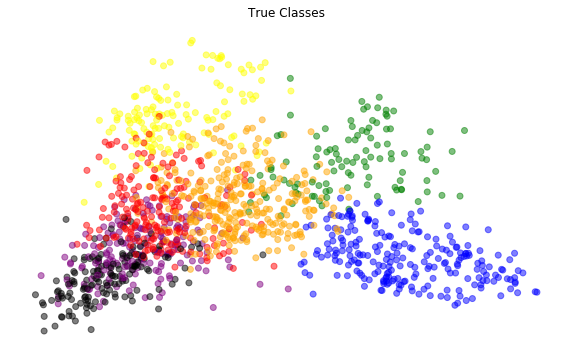

In [83]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

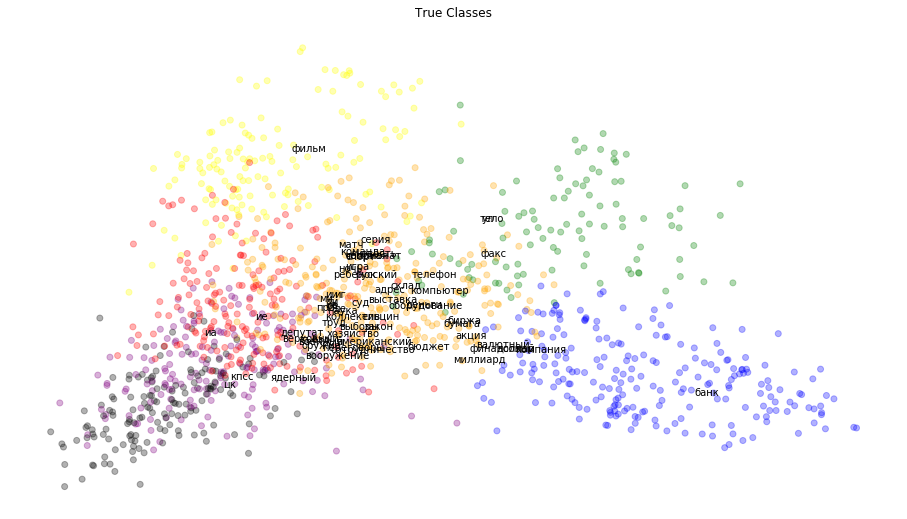

In [84]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [85]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

2020-06-17 20:47:45 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


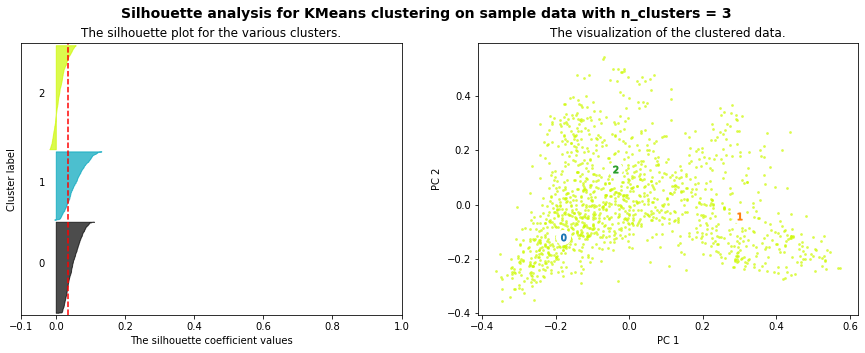

For n_clusters = 3, The average silhouette_score is : 0.036


In [86]:
X = izvestiiaTFVects.toarray()
plotSilhouette(3, X)

2020-06-17 20:47:47 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


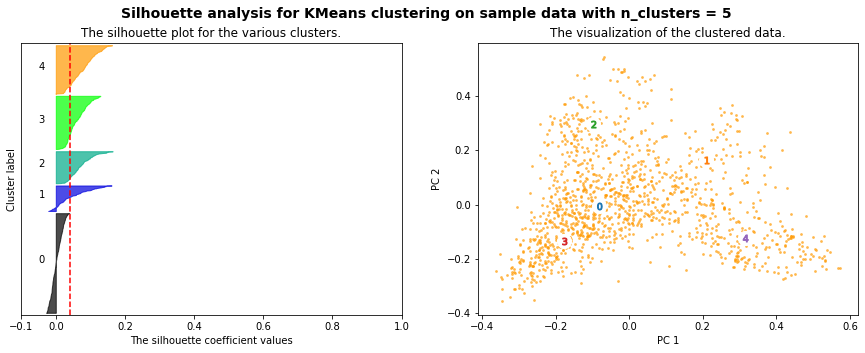

For n_clusters = 5, The average silhouette_score is : 0.041


In [87]:
X = izvestiiaTFVects.toarray()
plotSilhouette(5, X)

2020-06-17 20:47:49 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


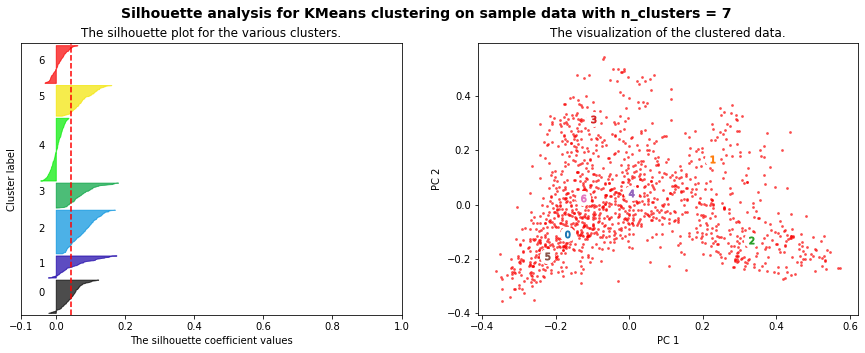

For n_clusters = 7, The average silhouette_score is : 0.043


In [88]:
X = izvestiiaTFVects.toarray()
plotSilhouette(7, X)

2020-06-17 20:47:52 WARNING: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


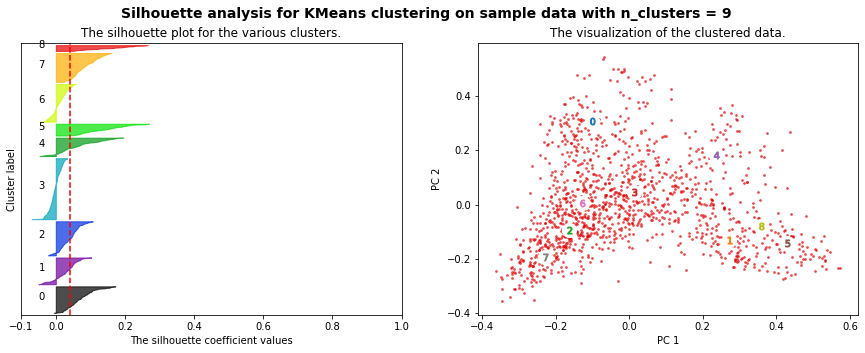

For n_clusters = 9, The average silhouette_score is : 0.041


In [89]:
X = izvestiiaTFVects.toarray()
plotSilhouette(9, X)

In [90]:
base_df["year"].value_counts()

1995    172
1996    148
1997    115
1992    107
1991     96
1989     90
1987     78
1986     78
1985     78
1990     77
1993     72
1994     71
1984     66
1988     56
Name: year, dtype: int64

In [91]:
docs_per_time_slice = [66, 78, 78, 78, 56, 90, 77, 96, 107, 72, 71, 172, 148, 115] # 14

In [92]:
izTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, norm='l2')

izvestiiaTFVects = izTFVectorizer.fit_transform(base_df['lemmas_clean_string'])

In [93]:
izvestiiaTFVects

<1304x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 376986 stored elements in Compressed Sparse Row format>

In [94]:
print(izvestiiaTFVects.shape)

(1304, 1000)


In [96]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]
base_df['reduced_lemmas'] = base_df['lemmas_clean'].apply(lambda x: dropMissing(x, izTFVectorizer.vocabulary_.keys()))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
dictionary = gensim.corpora.Dictionary(base_df['reduced_lemmas'])

In [99]:
corpus = [dictionary.doc2bow(text) for text in base_df['reduced_lemmas']]

In [100]:
gensim.corpora.MmCorpus.serialize('df.mm', corpus)
dfcorpus = gensim.corpora.MmCorpus('df.mm')

In [101]:
ldaseq = ldaseqmodel.LdaSeqModel.load("ldaseqmodel")

In [102]:
# 1984
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=0, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [103]:
#1985
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=1, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [104]:
# 1986
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=2, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [105]:
# 1987
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=3, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [106]:
# 1988
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=4, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [107]:
# 1989
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=5, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [108]:
# 1990
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=6, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [109]:
# 1991
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=7, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [110]:
# 1992
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=8, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [111]:
# 1993
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=9, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [112]:
# 1994
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=10, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [113]:
# 1995
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=11, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [114]:
# 1996
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=12, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [115]:
# 1997
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=13, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [116]:
base_df.to_json('base_df.json')